In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:/Users/RAMCHARAN/Downloads/heart.csv")  # Ensure correct path
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
X = df.drop("target", axis=1)
y = df["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
dt_preds = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")


Decision Tree Accuracy: 0.9854


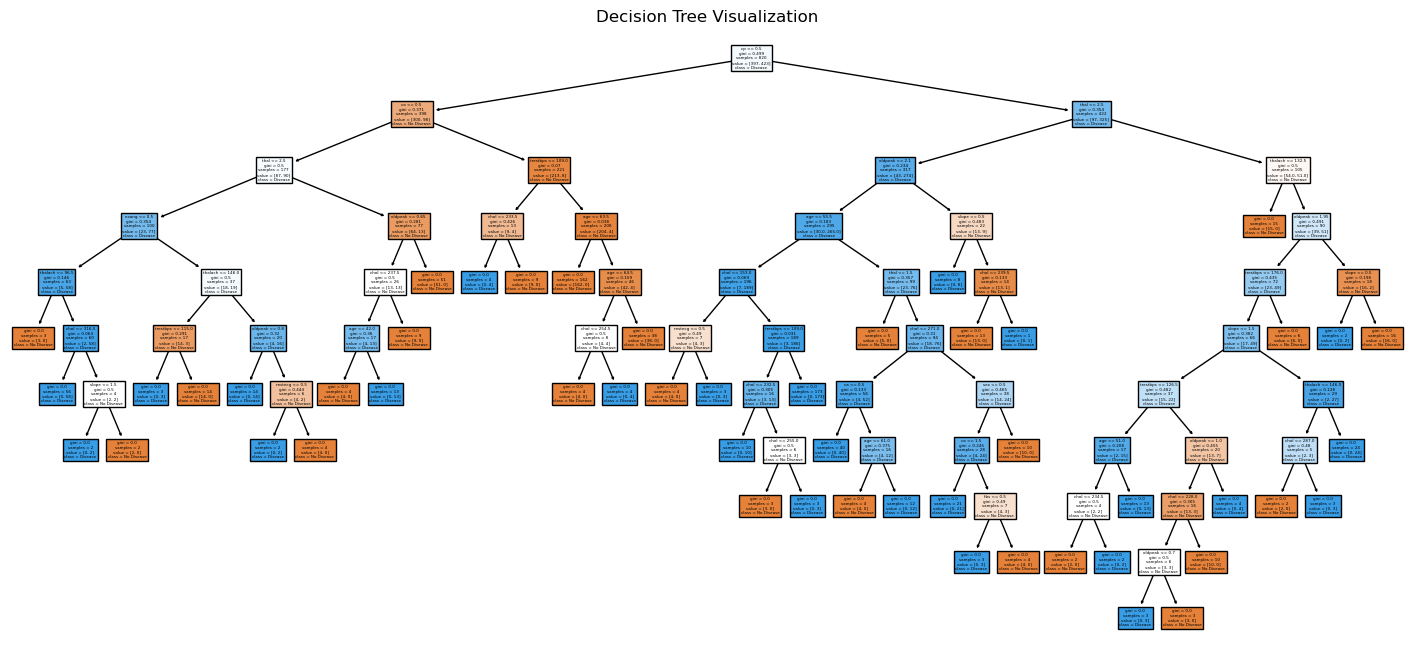

In [7]:
plt.figure(figsize=(18, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [8]:
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)
pruned_preds = dt_pruned.predict(X_test)
pruned_acc = accuracy_score(y_test, pruned_preds)
print(f"Pruned Decision Tree Accuracy (max_depth=3): {pruned_acc:.4f}")



Pruned Decision Tree Accuracy (max_depth=3): 0.7805


In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9854


In [10]:
importances = rf_model.feature_importances_
feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)


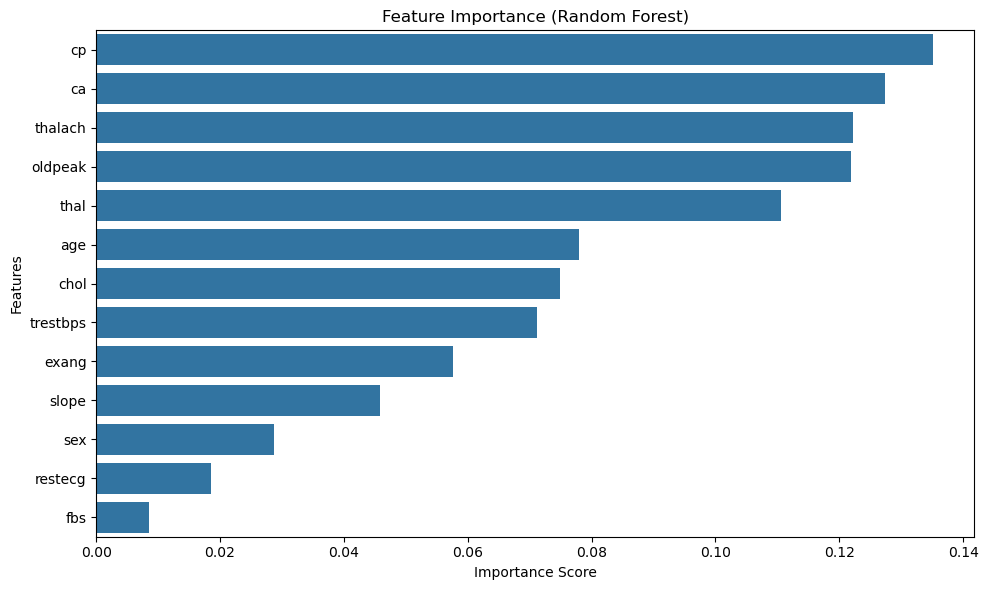

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [12]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073
